# Part 1:

# Complete all the basic exploratory steps

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df = pd.read_csv("C:/Users/CHETNA/Desktop/dataset/supermarket sales Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Part 2:

# 1.Is your supermarket more popular with males or females? 

In [15]:
print(df.groupby('Gender')['gross income'].mean())
print('Popular more with female')

Gender
Female    15.956936
Male      14.799487
Name: gross income, dtype: float64
Popular more with female


# 2.What does the customer rating look like and can you also comment on its skewness? 

C:\Users\CHETNA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


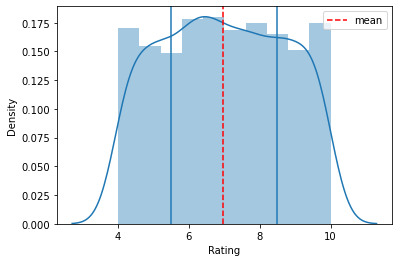

In [16]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25))
plt.axvline(x=np.percentile(df['Rating'],75))
plt.legend()

# 3.What can you say about the aggregate sales across the branches?3.

C:\Users\CHETNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


A    340
B    332
C    328
Name: Branch, dtype: int64

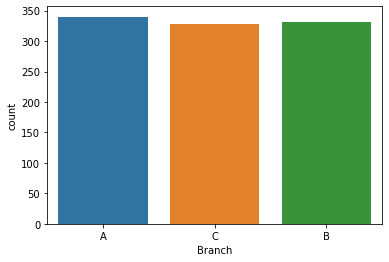

In [17]:
sns.countplot(df['Branch'])
df['Branch'].value_counts()


# 4.Which is the most popular payment method used by customers?

C:\Users\CHETNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0          Ewallet
1             Cash
2      Credit card
3          Ewallet
4          Ewallet
          ...     
995        Ewallet
996        Ewallet
997           Cash
998           Cash
999           Cash
Name: Payment, Length: 1000, dtype: object

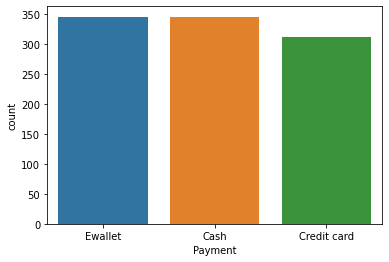

In [35]:
sns.countplot(df['Payment'])
df['Payment']

# Part-3: 

# 1.Does gross income affect customer ratings? 

C:\Users\CHETNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

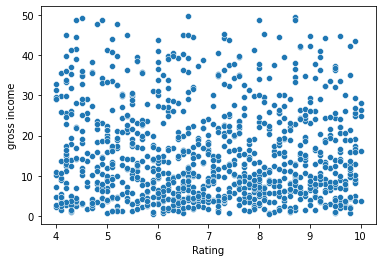

In [8]:
sns.scatterplot(df['Rating'], df['gross income'])

# 2.Which is the most profitable branch? 

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

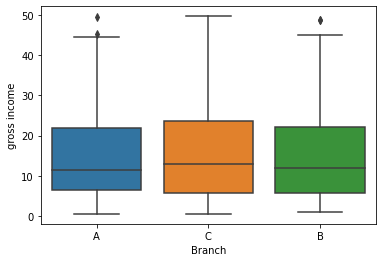

In [8]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

# 3.How is the relationship between Gender and Gross income? 

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

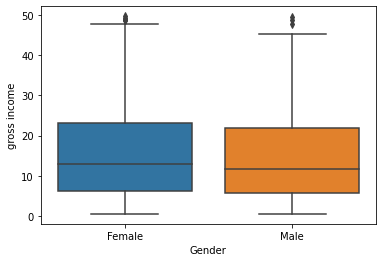

In [26]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

# 4.Can you see any time trend in gross income? 

<AxesSubplot:ylabel='gross income'>

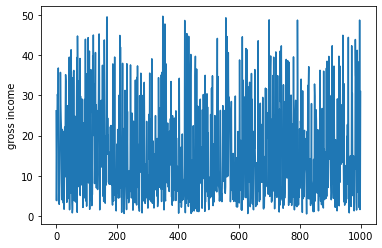

In [10]:
sns.lineplot(x= df.groupby(df.index).mean().index, 
             y = df.groupby(df.index).mean()['gross income'])

# 5.Which product line helps you generate the most income? 

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

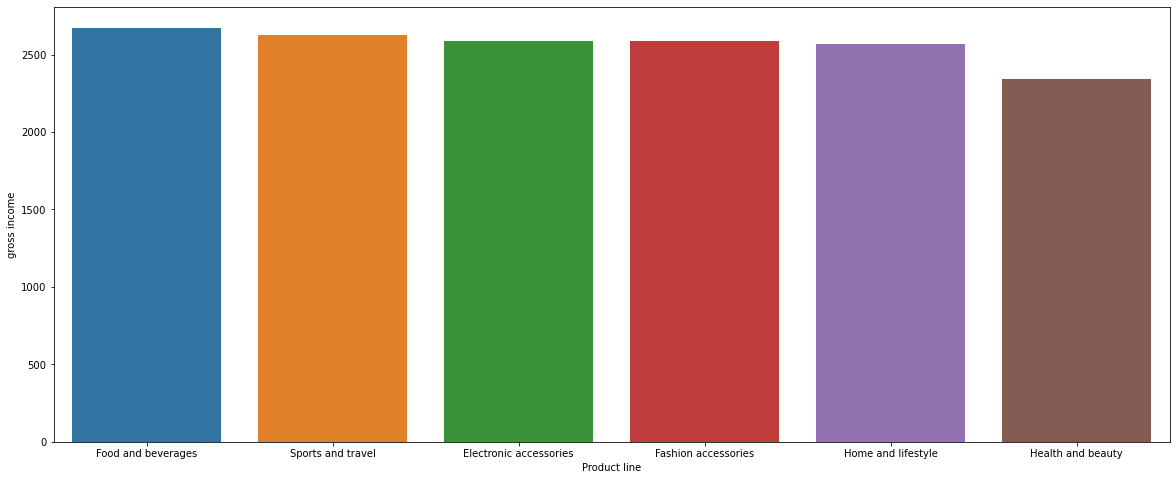

In [12]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

# 6.What is the spending pattern of both males and females, meaning in which category do they spend more? 

C:\Users\CHETNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product line', ylabel='count'>

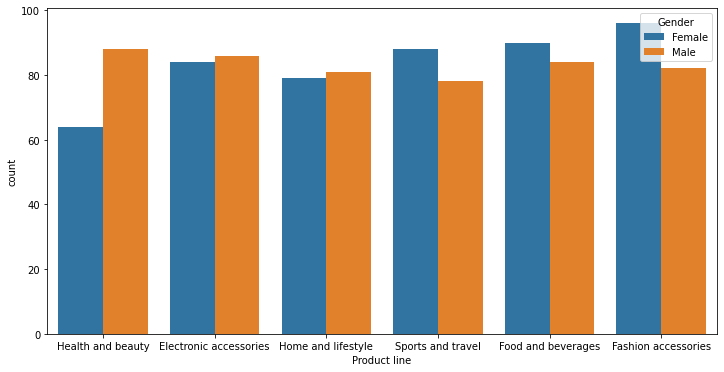

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(df['Product line'], hue = df.Gender)

# 7.How many products are bought by customers? 

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

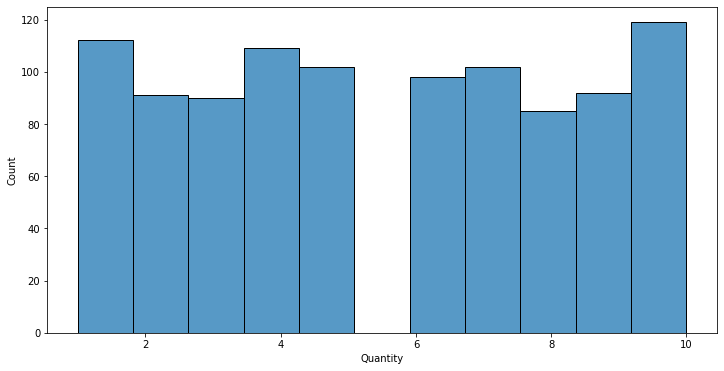

In [55]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.histplot(df['Quantity'])

# 8.Which day of the week has maximum sales? 


In [29]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,2021-10-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,2021-10-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,2021-10-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,2021-10-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,2021-10-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,2021-10-22 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,2021-10-22 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,2021-10-22 13:22:00,Cash,31.84,4.761905,1.5920,7.7,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,2021-10-22 15:33:00,Cash,65.82,4.761905,3.2910,4.1,15


# 9.Which hour of the day is busiest? 


<AxesSubplot:xlabel='Hour', ylabel='Quantity'>

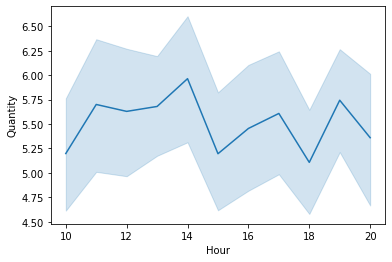

In [44]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()
sns.lineplot(x="Hour",  y = 'Quantity',data =df)

# 10.Which product line should your supermarket focus on? 


In [23]:
print(df.groupby('Product line')[['gross income']].mean())
print('Fashion accessories should have more focus ')

                        gross income
Product line                        
Electronic accessories     15.220597
Fashion accessories        14.528062
Food and beverages         15.365310
Health and beauty          15.411572
Home and lifestyle         16.030331
Sports and travel          15.812630
Fashion accessories should have more focus 


# 11.Which city should be chosen for expansion and what products should be focussed on?

C:\Users\CHETNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross income')

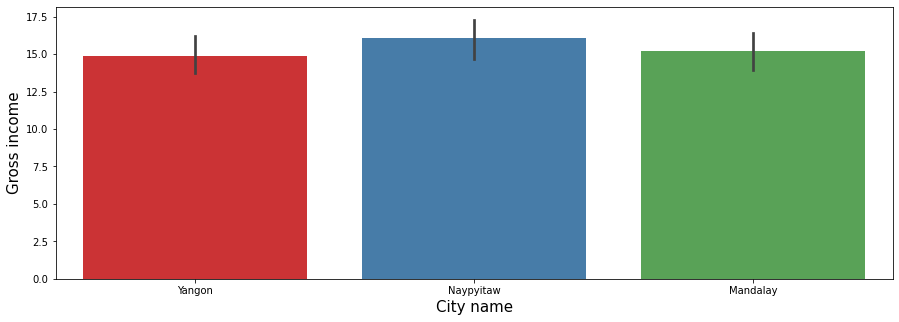

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(df['City'],df['gross income'],palette='Set1')
plt.xlabel('City name',fontsize='15')
plt.ylabel('Gross income',fontsize='15')